## Informe Trabajo Práctico 3

#### Agustina Colazo


#### Ejercicio 6: Distribución de Masas y Períodos Orbitales

Se instala el paquete pyvo necesario para acceder a la base de datos (de manera remota) y hacer el query para obtener una tabla con los datos de interes.

In [1]:
pip install pyvo


Note: you may need to restart the kernel to use updated packages.


In [2]:
# se descargar las librerias necesarias

import pyvo as vo
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd

In [3]:
# Utilizo pyvo y selecciono el servidor a partir del cual se obtendran los datos
service = vo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [4]:
# defino el query, es decir los datos de interes que se van a buscar en la base de datos
# Aca se utiliza SQL (Structured Query Language)   
 
#query = "SELECT target_name,mass,radius,period,star_distance,star_spec_type,detection_type FROM exoplanet.epn_core"
query = "SELECT target_name,detection_type FROM exoplanet.epn_core"
#print(type(query))  me dice que es un string

results = service.search(query)  # obtengo una tabla con los datos del query
print(type(results))  # este es una tabla tipo pyvo.dal.tap.TAPResults  (un tipo de formato)
table = results.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data = table.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
vot = results.votable
vot.to_xml("Exoplanets_Data.xml")
print(data)

<class 'pyvo.dal.tap.TAPResults'>
     target_name   detection_type
0       11 Com b  Radial Velocity
1       11 Oph b          Imaging
2       11 UMi b  Radial Velocity
3       14 And b  Radial Velocity
4       14 Her b  Radial Velocity
...          ...              ...
5197   ups And b  Radial Velocity
5198   ups And c  Radial Velocity
5199   ups And e  Radial Velocity
5200   ups Leo b  Radial Velocity
5201   zet Del B          Imaging

[5202 rows x 2 columns]


In [5]:
#print(data)
#print(len(data))

In [6]:
#data['radius'].isna()  # me devuelve true donde no hay datos
#data['radius'].isna().sum() 
#data['radius'][~data['radius'].isna()]  # de la columna radius con solo aquellos exoplanteas que 
# si tienen el radius calculado ~data['radius'].isna()= no me des (de la tabla data)los valores de radius donde isna es True 

Metodos de Deteccion:

Imaging

Radial Velocity

Timing

Microlensing

Primary Transit

Astrometry

TTV

Secondary Transit


No hay planetas detectados por Timing
No hay planetas detectados por Secondary Transit


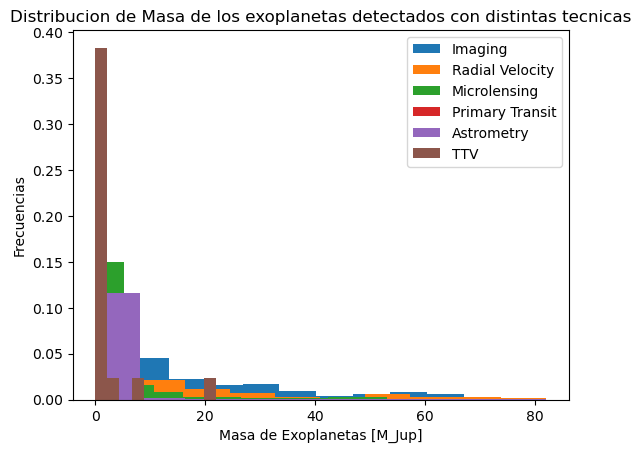

In [58]:
# planetas detectados por Imaging
query1 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Imaging'" 
#print(type(query))  me dice que es un string
planets_imaging = service.search(query1)  # obtengo una tabla con los datos del query
table1 = planets_imaging.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data1 = table1.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot1 = planets_imaging.votable
#vot1.to_xml("Exoplanets_Imaging.xml")
#print(data1)
# Inner Join
exo_img = pd.merge(left = data1, right = data, how = 'inner',on = 'target_name' )
#print(exo_img)
m_img = exo_img['mass'][~exo_img['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m_img))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_img, density=True, label = 'Imaging')
#plt.xlabel('Masa de Exoplanetas detectados por Imaging [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por Imaging')
#plt.show()

# planetas detectados por Radial Velocity
query2 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Radial Velocity'" 
#print(type(query))  me dice que es un string
planets_radvel = service.search(query2)  # obtengo una tabla con los datos del query
table2 = planets_radvel.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data2 = table2.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data2)
# Inner Join
exo_radvel = pd.merge(left = data2, right = data, how = 'inner',on = 'target_name' )
#print(exo_img)
m_radvel = exo_radvel['mass'][~exo_radvel['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_radvel, density=True, label = 'Radial Velocity')
#plt.xlabel('Masa de Exoplanetas detectados por Radial Velocity [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por Radial Velocity')
#plt.show()

# planetas detectados por Timing  (NO HAY NINGUNO)
query3 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Timing'" 
#print(type(query))  me dice que es un string
planets_timing = service.search(query3)  # obtengo una tabla con los datos del query
table3 = planets_timing.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data3 = table3.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot3 = planets_imaging.votable
#vot3.to_xml("Exoplanets_timing.xml")
#print(data3)
print('No hay planetas detectados por Timing')


# planetas detectados por Microlensing
query4 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Microlensing'" 
#print(type(query))  me dice que es un string
planets_micro = service.search(query4)  # obtengo una tabla con los datos del query
table4 = planets_micro.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data4 = table4.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data4)
# Inner Join
exo_micro = pd.merge(left = data4, right = data, how = 'inner',on = 'target_name' )
#print(exo_img)
m_micro = exo_micro['mass'][~exo_micro['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_micro, density = True,label = 'Microlensing')
#plt.xlabel('Masa de Exoplanetas detectados por Microlensing [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por Microlensing')
#plt.show()


# planetas detectados por Primary Transit
query5 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Primary Transit'" 
#print(type(query))  me dice que es un string
planets_transit = service.search(query5)  # obtengo una tabla con los datos del query
table5 = planets_transit.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data5 = table5.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data4)
# Inner Join
exo_transit = pd.merge(left = data5, right = data, how = 'inner',on = 'target_name' )
#print(exo_img)
m_transit = exo_transit['mass'][~exo_transit['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_transit, density = True, label = 'Primary Transit')
#plt.xlabel('Masa de Exoplanetas detectados por Primary Transit [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por Primary Transit')
#plt.show()


# planetas detectados por Astrometry
query6 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Astrometry'" 
#print(type(query))  me dice que es un string
planets_astrom = service.search(query6)  # obtengo una tabla con los datos del query
table6 = planets_astrom.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data6 = table6.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data4)
# Inner Join
exo_astrom  = pd.merge(left = data6, right = data, how = 'inner',on = 'target_name' )
#print(exo_img)
m_astrom  = exo_astrom ['mass'][~exo_astrom ['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_transit, density = True, label = 'Astrometry')
#plt.xlabel('Masa de Exoplanetas detectados por Astrometry [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por Astrometry')
#plt.show()

# planetas detectados por TTV
query7 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='TTV'" 
#print(type(query))  me dice que es un string
planets_TTV = service.search(query7)  # obtengo una tabla con los datos del query
table7 = planets_TTV.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data7 = table7.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data7)
# Inner Join
exo_TTV  = pd.merge(left = data7, right = data, how = 'inner',on = 'target_name' )
#print(exo_TTV)
m_TTV  = exo_TTV['mass'][~exo_TTV['mass'].isna()]  # tomo todos los exoplanetas que tienen el dato de la masa
#print(len(m))
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(m_TTV, density = True, label = 'TTV')
#plt.xlabel('Masa de Exoplanetas detectados por TTV [M_Jup]')
#plt.ylabel('Distribucion de Masa')
#plt.title('Distribucion de Masa de los exoplanetas detectados por TTV')
#plt.show()


# planetas detectados por Secondary Transit
query8 = "SELECT target_name,detection_type,mass,period FROM exoplanet.epn_core WHERE detection_type='Secondary Transit'" 
#print(type(query))  me dice que es un string
planets_transit2 = service.search(query8)  # obtengo una tabla con los datos del query
table8 = planets_transit2.to_table()  # ahora la transformo en una 'astropy table'  (otro formato)
data8 = table8.to_pandas()  # ahora la transformo en un 'data frame' usando pandas (otro formato)
#vot2 = planets_imaging.votable
#vot2.to_xml("Exoplanets_Imaging.xml")
#print(data8)
print('No hay planetas detectados por Secondary Transit')



plt.xlabel('Masa de Exoplanetas [M_Jup]')
plt.ylabel('Frecuencias')
plt.legend()
plt.title('Distribucion de Masa de los exoplanetas detectados con distintas tecnicas')
plt.show()

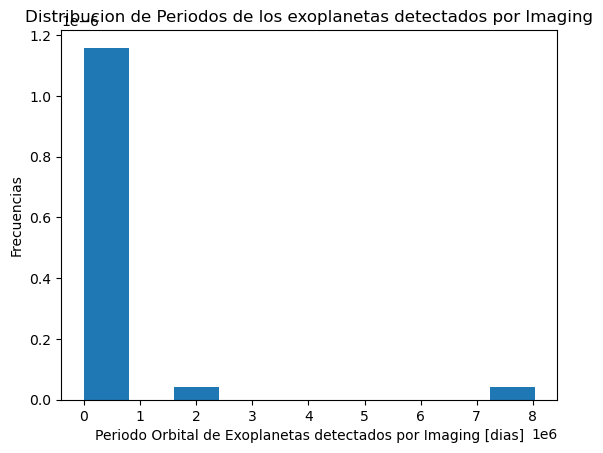

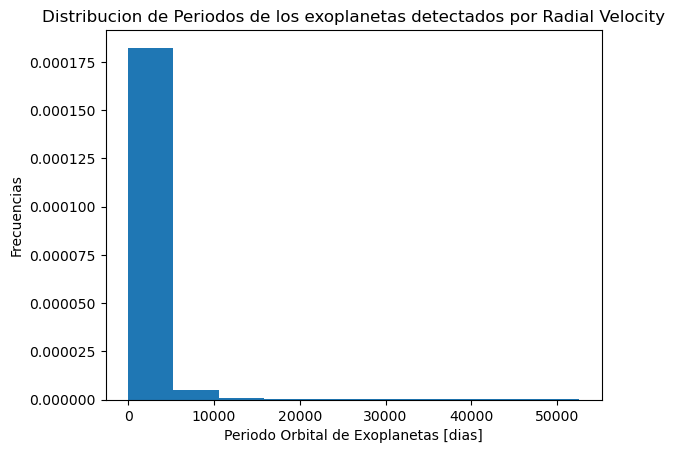

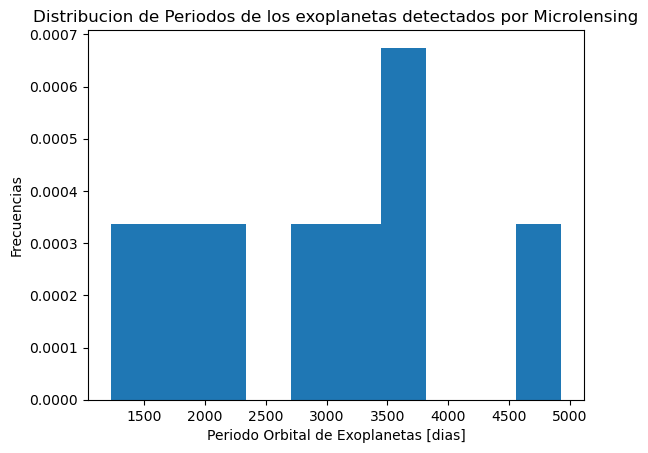

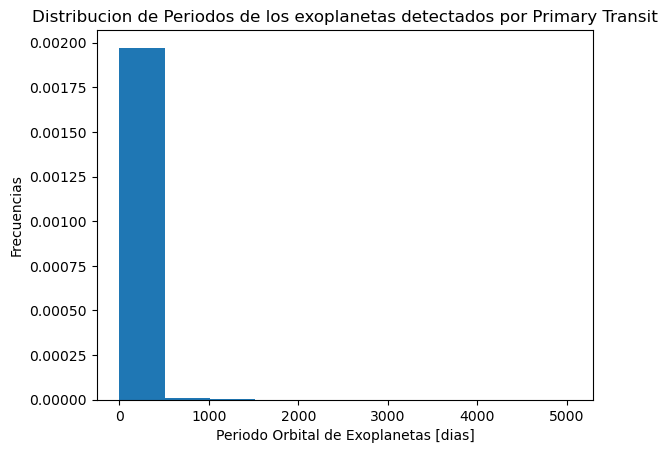

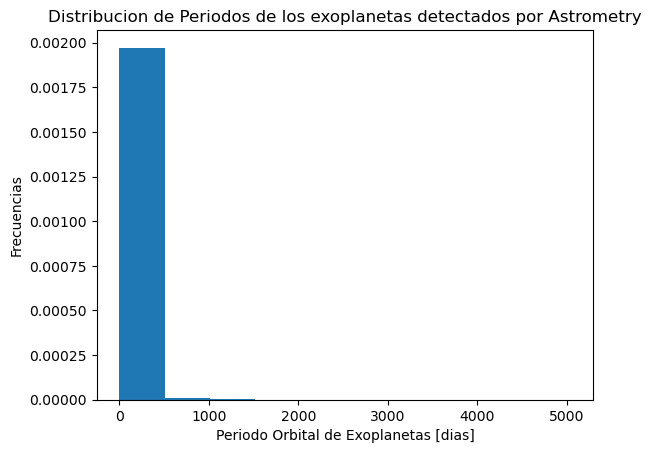

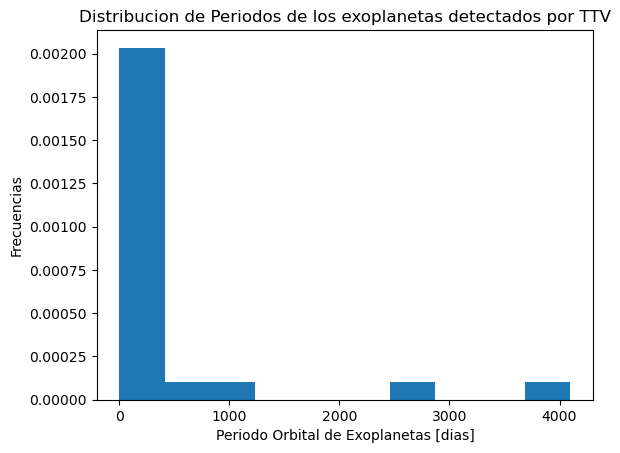

In [61]:
# planetas detectados por Imaging
#print(exo_img)
p_img = exo_img['period'][~exo_img['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_img)
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_img, density=True, label = 'Imaging')
plt.xlabel('Periodo Orbital de Exoplanetas detectados por Imaging [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por Imaging')
plt.show()

# planetas detectados por Radial Velocity
#print(exo_radvel)
p_radvel = exo_radvel['period'][~exo_radvel['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_radvel)
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_radvel, density=True, label = 'Radial Velocity')
plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por Radial Velocity')
plt.show()


# planetas detectados por Microlensing
#print(exo_micro)
p_micro = exo_micro['period'][~exo_micro['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_micro )
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_micro, density = True,label = 'Microlensing')
plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por Microlensing')
plt.show()

# planetas detectados por Primary Transit
#print(exo_transit)
p_transit = exo_transit['period'][~exo_transit['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_transit)
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_transit, density = True, label = 'Primary Transit')
plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por Primary Transit')
plt.show()


# planetas detectados por Astrometry
#print(exo_atrom)
p_astrom  = exo_astrom ['period'][~exo_astrom ['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_astrom)
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_transit, density = True, label = 'Astrometry')
plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por Astrometry')
plt.show()

# planetas detectados por TTV
#print(exo_TTV)
p_TTV  = exo_TTV['period'][~exo_TTV['period'].isna()]  # tomo todos los exoplanetas que tienen el dato del periodo
#print(p_TTV)
#aca simplemente hago el histograma de los datos con sus frecuencias 
plt.hist(p_TTV, density = True, label = 'TTV')
plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
plt.ylabel('Frecuencias')
plt.title('Distribucion de Periodos de los exoplanetas detectados por TTV')
plt.show()





#plt.xlabel('Periodo Orbital de Exoplanetas [dias]')
#plt.ylabel('Frecuencias')
#plt.legend()
#plt.title('Distribucion de Periodos de los exoplanetas detectados con distintas tecnicas')
#plt.show()